In [3]:
import pickle
import numpy as np
import skimage.io as io
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## Data sources:
## Original data repository: http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
## link to cropped images: https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

# Process pickles

training_file = 'train.p'
testing_file = 'test.p'
valid_file ='valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)
  
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid =valid['features'], test['labels']

In [4]:
# Converrt to numpy arrays

#train images
train_features = np.array(X_train)
train_labels = np.array(y_train)

#Test images
test_features = np.array(X_test)
test_labels = np.array(y_test)

#Validation Images
valid_features = np.array(X_valid)
valid_labels = np.array(y_valid)

In [5]:
# Display Class Names and Ids

import csv
import pandas as pd

file_name = 'ClassNames.csv'
df = pd.read_csv(file_name)
df


,ClassId,Sign Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


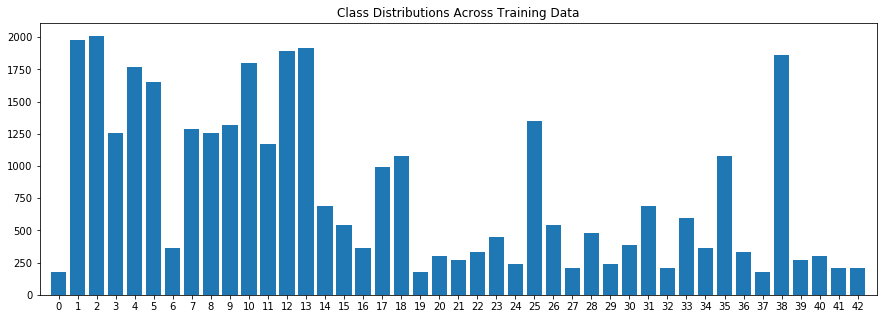

In [41]:
## Count frequency of each label in training and test set

tr_labels, tr_count = np.unique(train_labels, return_counts=True)

###Plot training results
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()  #get current axes
axes.set_xlim([-1, 43])

plt.bar(tr_labels, tr_count, tick_label = tr_labels, width=0.8, align='center')
plt.title('Class Distributions Across Training Data')



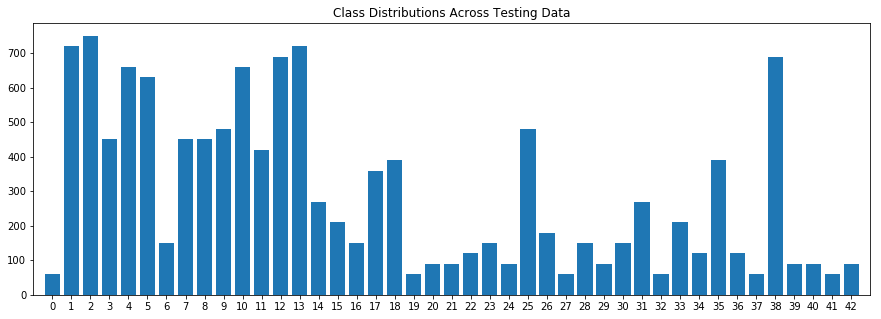

In [40]:
###Plot test results
te_labels, te_count = np.unique(test_labels, return_counts=True)

###Plot training results
plt.rcParams["figure.figsize"] = [15, 5]
axes = plt.gca()  #get current axes
axes.set_xlim([-1, 43])

plt.bar(te_labels, te_count, tick_label = te_labels, width=0.8, align='center')
plt.title('Class Distributions Across Testing Data')

In [6]:
# Display training set feature arrays
# We can visually see the images need to be normalized before building model
train_features

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ..., 
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ..., 
        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ..., 
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ..., 
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ..., 
         [ 27,  24,  22],
  

In [8]:
##Generate basic stats (i.e. counts of classes, and items)
## Note: image_shape output verifies that the images have been pre-cropped
# Number of training examples
num_train = train_features.shape[0]

# Number of validation examples.
num_valid = valid_features.shape[0]

# Number of testing examples.
num_test = test_features.shape[0]

# Check shape of test features
image_shape = test_features[0].shape

# Total classes in dataset.
num_classes = len(set(y_train))

print("Total training examples =", num_train)
print("Total validation examples =", num_valid)
print("Total testing examples =", num_test)
print("Image data shape =", image_shape)
print("Number of classes =", num_classes)

Total training examples = 34799
Total validation examples = 4410
Total testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Vehicles over 3.5 metric tons prohibited
Speed limit (30km/h)
General caution
Roundabout mandatory
Keep right
Speed limit (30km/h)
No entry
Road narrows on the right


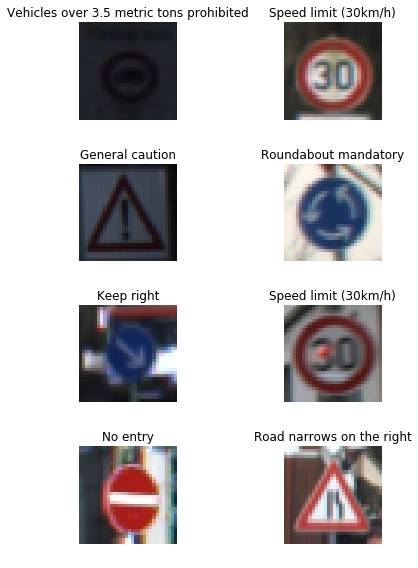

In [19]:
## Show image samples with corresponding class label
## Will display a random set of 8 images from the training set
## May be run multiple times to get a feel for the difference in image quality
import matplotlib.pyplot as plt
%matplotlib inline
import random
import csv  #for grabbing the name and class ids associated with images
 
def show_images(plots, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6, 8))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title])
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
           
        axs[index].set_axis_off()
       
    plt.tight_layout()
   
class_names = np.genfromtxt('ClassNames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
 
num_examples = 8
figures = {}
labels = {}
for i in range(num_examples):
    index = random.randint(0, num_train-1)
    labels[i] = class_names[train_labels[index]][1].decode('ascii') # format the labels (remobe the "b'" before each line)
    print(class_names[train_labels[index]][1].decode('ascii'))
    figures[i] = train_features[index]
   
show_images(plots, 4, 2, labels)

In [20]:
#Check pixel value ranges
#Modified from example provided by: https://github.com/libphy/dldev/blob/master/CatDog.ipynb
for i in range(3):
    print(train_features[:,:,:,i].max(), train_features[:,:,:,i].min(), train_features[:,:,:,i].mean())

255 0 86.69812205
255 3 79.4959406105
255 0 81.8387044505


In [21]:
## Normalize 
## Code modified from: https://github.com/libphy/dldev/blob/master/CatDog.ipynb
means = [train_features[:,:,:,i].mean() for i in range(3)]
maxs = [train_features[:,:,:,i].max() for i in range(3)]
mins = [train_features[:,:,:,i].min() for i in range(3)]
Xn = np.concatenate([np.expand_dims((train_features[:,:,:,i]-means[i])/(maxs[i]-mins[i]), axis=3) for i in range(3)], axis=3)

In [22]:
# Verify output lengths match
print(len(train_features))
print(len(Xn))

34799
34799


In [23]:
## Verify standard dev for each image channel
for i in range(3):
    print(Xn[:,:,:,i].std())

0.271701485559
0.262975937109
0.265750374423


In [24]:
## Import keras libraries for model building
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical

In [30]:
################
## 2D Model #1
## Using Keras Sequential model
## Optimizer = SGD (stochastic gradient descent)
## Activation = relu
## 2 dense layers set to 43, and 512
## Loss = categorical crossentropy
###############
model = Sequential()
model.add(Convolution2D(16,3,3, input_shape=(32,32,3), activation='relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(43))
model.add(Activation('softmax'))
sgd = SGD(lr=0.01, decay=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['acc'])

C:\Users\satur\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [29]:
#Training Data

Y = to_categorical(train_labels)  
Xtr, ytr = shuffle(Xn,Y,random_state=0)

#Testing Data (one hot encoding)
Y_test = to_categorical(test_labels)

In [33]:
## Fit model 1
model.fit(Xtr, ytr, batch_size=32, epochs=15, validation_data=(test_features, Y_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/15
34799/34799 [==============================] - 90s - loss: 0.1580 - acc: 0.9718 - val_loss: 3.3518 - val_acc: 0.7881
Epoch 2/15
34799/34799 [==============================] - 89s - loss: 0.1559 - acc: 0.9716 - val_loss: 3.3367 - val_acc: 0.7908
Epoch 3/15
34799/34799 [==============================] - 89s - loss: 0.1539 - acc: 0.9728 - val_loss: 3.3593 - val_acc: 0.7888
Epoch 4/15
34799/34799 [==============================] - 90s - loss: 0.1521 - acc: 0.9730 - val_loss: 3.3321 - val_acc: 0.7895
Epoch 5/15
34799/34799 [==============================] - 89s - loss: 0.1504 - acc: 0.9739 - val_loss: 3.3624 - val_acc: 0.7884
Epoch 6/15
34799/34799 [==============================] - 90s - loss: 0.1488 - acc: 0.9736 - val_loss: 3.3472 - val_acc: 0.7886
Epoch 7/15
34799/34799 [==============================] - 94s - loss: 0.1472 - acc: 0.9745 - val_loss: 3.3863 - val_acc: 0.7869
Epoch 8/15
34799/34799 [==============================

In [35]:
#Calculate loss
score = model.evaluate(test_features, Y_test,  verbose=0)
print('Loss:', score[0])

Loss: 3.352072559


In [36]:
#Save Model Weights

fname = "Model_1_CNN.hdf5"
model.save_weights(fname,overwrite=True)

In [20]:
#Load Model Weights

fname = "Model_1_CNN.hdf5"
model.load_weights(fname)

In [45]:
###########
## Model #2
## Using Keras Sequential model
## Optimizer = Adagrad
## Activation = relu
## 2 dense layers set to 43, and 512
## Loss = categorical crossentropy
###############
from keras import optimizers
from keras.optimizers import Adagrad

In [52]:
ada_model = Sequential()
ada_model.add(Convolution2D(16,3,3, input_shape=(32,32,3), activation='relu'))
ada_model.add(Flatten())
ada_model.add(Dense(512))
ada_model.add(Dense(43))
ada_model.add(Activation('softmax'))
ada = keras.optimizers.Adagrad(lr=0.01, decay=0.01)
ada_model.compile(optimizer=ada, loss="categorical_crossentropy", metrics=['acc'])

C:\Users\satur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  


In [53]:
ada_model.fit(Xtr, ytr, batch_size=32, epochs=15, validation_data=(test_features, Y_test))

Train on 34799 samples, validate on 12630 samples
Epoch 1/15
34799/34799 [==============================] - 130s - loss: 0.7825 - acc: 0.8274 - val_loss: 4.7042 - val_acc: 0.6992
Epoch 2/15
34799/34799 [==============================] - 130s - loss: 0.3659 - acc: 0.9259 - val_loss: 4.3751 - val_acc: 0.7203
Epoch 3/15
34799/34799 [==============================] - 130s - loss: 0.3290 - acc: 0.9342 - val_loss: 4.2528 - val_acc: 0.7279
Epoch 4/15
34799/34799 [==============================] - 129s - loss: 0.3114 - acc: 0.9384 - val_loss: 4.1723 - val_acc: 0.7331
Epoch 5/15
34799/34799 [==============================] - 137s - loss: 0.3008 - acc: 0.9402 - val_loss: 4.1244 - val_acc: 0.7357
Epoch 6/15
34799/34799 [==============================] - 153s - loss: 0.2935 - acc: 0.9417 - val_loss: 4.1093 - val_acc: 0.7371
Epoch 7/15
34799/34799 [==============================] - 141s - loss: 0.2884 - acc: 0.9429 - val_loss: 4.1013 - val_acc: 0.7378
Epoch 8/15
34799/34799 [=======================

In [56]:
#Calculate loss Adagrad
ada_score = ada_model.evaluate(test_features, Y_test,  verbose=0)
print('Ada Loss:', ada_score[0])

Ada Loss: 4.05138224883


In [57]:
############
## 2D Model #3
## Using keras sequential model
##optimizer = adam
## activation =relu
## 2 dense layers set to 43, and 512
## loss = categorical crossentropy
from keras import optimizers
from keras.optimizers import Adam

In [62]:
adam_model = Sequential()
adam_model.add(Convolution2D(16,3,3, input_shape=(32,32,3), activation='relu'))
adam_model.add(Flatten())
adam_model.add(Dense(512))
adam_model.add(Dense(43))
adam_model.add(Activation('softmax'))
adam = keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00 ) ## Changed to recommended parameters
adam_model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['acc'])

C:\Users\satur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., activation="relu")`
  


In [63]:
adam_model.fit(Xtr, ytr, batch_size=32, epochs=15, validation_data=(test_features, Y_test))


Train on 34799 samples, validate on 12630 samples
Epoch 1/15
34799/34799 [==============================] - 143s - loss: 0.5623 - acc: 0.8585 - val_loss: 3.0051 - val_acc: 0.8119
Epoch 2/15
34799/34799 [==============================] - 143s - loss: 0.1550 - acc: 0.9605 - val_loss: 2.0540 - val_acc: 0.8709
Epoch 3/15
34799/34799 [==============================] - 143s - loss: 0.1066 - acc: 0.9716 - val_loss: 2.2442 - val_acc: 0.8595
Epoch 4/15
34799/34799 [==============================] - 142s - loss: 0.1034 - acc: 0.9748 - val_loss: 2.2907 - val_acc: 0.8572
Epoch 5/15
34799/34799 [==============================] - 143s - loss: 0.0831 - acc: 0.9786 - val_loss: 2.4983 - val_acc: 0.8443
Epoch 6/15
34799/34799 [==============================] - 143s - loss: 0.0588 - acc: 0.9854 - val_loss: 3.3145 - val_acc: 0.7938
Epoch 7/15
34799/34799 [==============================] - 147s - loss: 0.0963 - acc: 0.9779 - val_loss: 1.9599 - val_acc: 0.8773
Epoch 8/15
34799/34799 [=======================

In [64]:
#Calculate loss Adam
adam_score = adam_model.evaluate(test_features, Y_test,  verbose=0)
print('Adam Loss:', adam_score[0])

Adam Loss: 2.1295039485
